In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/atividade_opcional_01/BreastCancerWisconsinDataSet.csv')

In [3]:
display(df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [15]:
# separando a coluna da classe do dataset
y = df.iloc[:,1].values
# substituindo o valor string em numérico, baseado no que determina a função de ativação
y = np.where(y == 'M', -1, 1)
# separando as colunas com as variáveis das amostras do dataset para determinar os inputs da RNA
X = df.iloc[:, 2:32].values

In [14]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

<function matplotlib.pyplot.show(close=None, block=None)>

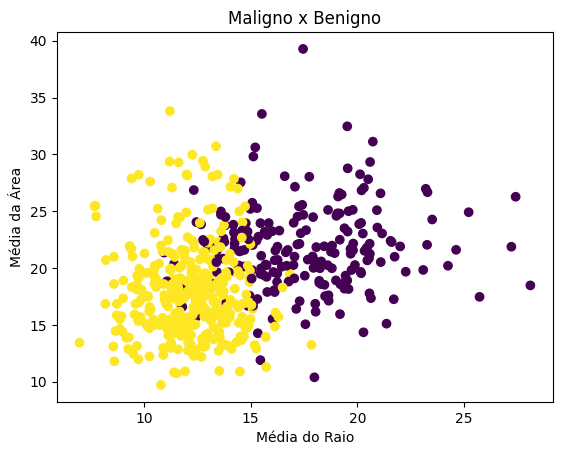

In [ ]:
# plotando o gráfico para verificação se as amostras são linearmente separáveis
plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=y, cmap='viridis')
plt.title("Maligno x Benigno")
plt.xlabel('Média do Raio')
plt.ylabel('Média da Área')
plt.show

In [ ]:
# separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)
print(X_train.shape)
print(y_train.shape)

(398, 30)
(398,)


In [ ]:
p = Perceptron(random_state=30, eta0=0.01, alpha=0.001, penalty='l2')
p.fit(X_train, y_train)

Perceptron(alpha=0.001, eta0=0.01, penalty='l2', random_state=30)

In [ ]:
predictions_train = p.predict(X_train) # validação do conjunto de amostras treinadas
train_score = accuracy_score(predictions_train, y_train) # avaliação de acurácia da classificação das amostras que foram apresentadas no
print("Acurácia com dados de treinamento: ", train_score)
predictions_test = p.predict(X_test) # validação do conjunto de amostras que não participaram do treinamento
train_score = accuracy_score(predictions_test, y_test) # avaliação de acurácia da classificação das amostras que foram apresentadas no t
print("Acurácia com dados de treinamento: ", train_score)
print(classification_report(predictions_test, y_test))
print("Número de épocas no treinamento: ", p.n_iter_)
print("Lista de parâmetros configurados na Perceptron: ", p.get_params())

Acurácia com dados de treinamento:  0.9195979899497487
Acurácia com dados de treinamento:  0.9239766081871345
              precision    recall  f1-score   support

          -1       0.83      0.94      0.88        52
           1       0.97      0.92      0.94       119

    accuracy                           0.92       171
   macro avg       0.90      0.93      0.91       171
weighted avg       0.93      0.92      0.93       171

Número de épocas no treinamento:  20
Lista de parâmetros configurados na Perceptron:  {'alpha': 0.001, 'class_weight': None, 'early_stopping': False, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'random_state': 30, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [ ]:
y_pred = p.predict(X_test)
test_score = accuracy_score(y_pred, y_test)
print("Acurácia dos testes: ", test_score)

print(classification_report(y_pred, y_test))

print("Número de épocas no treinamento: ", p.n_iter_)
print("Lista de parâmetros configurados na Perceptron: ", p.get_params())

Acurácia dos testes:  0.9239766081871345
              precision    recall  f1-score   support

          -1       0.83      0.94      0.88        52
           1       0.97      0.92      0.94       119

    accuracy                           0.92       171
   macro avg       0.90      0.93      0.91       171
weighted avg       0.93      0.92      0.93       171

Número de épocas no treinamento:  20
Lista de parâmetros configurados na Perceptron:  {'alpha': 0.001, 'class_weight': None, 'early_stopping': False, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'random_state': 30, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [ ]:
# Executar validação cruzada com 5 dobras (5-fold cross-validation)
scores = cross_val_score(p, X, y, cv=5, scoring='accuracy')

# Exibir os resultados da validação cruzada
print("Acurácias nas 5 dobras: ", scores)
print("Média da acurácia: ", scores.mean())
print("Desvio padrão das acurácias: ", scores.std())

Acurácias nas 5 dobras:  [0.9122807  0.92105263 0.85964912 0.93859649 0.91150442]
Média da acurácia:  0.9086166744294365
Desvio padrão das acurácias:  0.02635537044215609


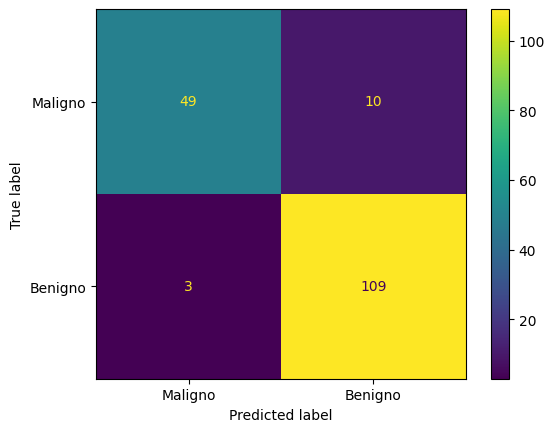

In [ ]:
# Apresentação gráfica da matriz de confusão dos testes classificados
conf_matrix = confusion_matrix(y_test, predictions_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Maligno', 'Benigno'])
cm_display.plot()
plt.show()